In [1]:
%pylab inline
import numpy as np
from sklearn import neighbors
from sklearn.cluster import KMeans
from numpy import genfromtxt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from pandas import *

import pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
TRAIN_TEST_RATIO = 3

## Get data

In [3]:
people_data = genfromtxt('people.txt',delimiter = ',')
item_data = genfromtxt('item.txt',delimiter = ',')
none_data = genfromtxt('none.txt',delimiter = ',')
data = np.concatenate((people_data,item_data,none_data),axis=0)
label = np.array([2] * len(people_data) + [1] * len(item_data) + [0] * len(none_data))
data = np.log(data+1) #some data will be extreamly large, we use log function to map them into a small space

## Get training and test dataset

In [4]:
people_test = data[label==2][:len(people_data)//TRAIN_TEST_RATIO]
people_train = data[label==2][len(people_data)//TRAIN_TEST_RATIO:]
item_test = data[label==1][:len(item_data)//TRAIN_TEST_RATIO]
item_train = data[label==1][len(item_data)//TRAIN_TEST_RATIO:]
none_test = data[label==0][:len(none_data)//TRAIN_TEST_RATIO]
none_train = data[label==0][len(none_data)//TRAIN_TEST_RATIO:]

train_data = np.concatenate((people_train,item_train,none_train),axis=0)
test_data = np.concatenate((people_test,item_test,none_test),axis=0)

train_label = [2] * len(people_train) + [1] * len(item_train) + [0] * len(none_train)
test_label = [2] * len(people_test) + [1] * len(item_test) + [0] * len(none_test)
train_label = np.array(train_label)
test_label = np.array(test_label)

## Normalize data

In [5]:
#normalize the data
ftsclr=StandardScaler()
train_data = ftsclr.fit_transform(train_data)
test_data = ftsclr.transform(test_data)

## Get PCA data

In [6]:
# tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
# data_tsne = tsne.fit_transform(data)

pca = PCA(n_components=2)
pca_train_data = pca.fit_transform(train_data)
pca_test_data = pca.transform(test_data)
pickle.dump(pca,open("F:\ESP32\SeatU\src\data\PCA_model","wb"))

## Print data size

In [7]:
print ("people data size:", np.shape(people_data))
print ("item data size:", np.shape(item_data))
print ("none data size:", np.shape(none_data))
print("train data size:", np.shape(train_data))
print ("train label size:",np.shape(train_label))
print("test data size:", np.shape(test_data))
print ("test label size:",np.shape(test_label))

people data size: (233, 4)
item data size: (75, 4)
none data size: (114, 4)
train data size: (282, 4)
train label size: (282,)
test data size: (140, 4)
test label size: (140,)


## Plot training data
green points: item  
yellow points: people  
purple points: none  

In [8]:
def plot_scatter(x,y,c,title_name,xlabel,ylabel,save_name):
    figure()
    
    scatter(x,y, c=c)
    g1 = plt.scatter(x[y==0], y[y==0], c='purple')
    g2 = plt.scatter(x[y==1], y[y==1], c='green')
    g3 = plt.scatter(x[y==2], y[y==2], c='yellow')
    plt.legend(handles=[g1,g2,g3], labels=['None', 'Item', 'People'])
    title(title_name)
    plt.xlabel(xlabel,fontsize=14,alpha=0.5)
    plt.ylabel(ylabel,fontsize=14,alpha=0.5)
    savefig(save_name)

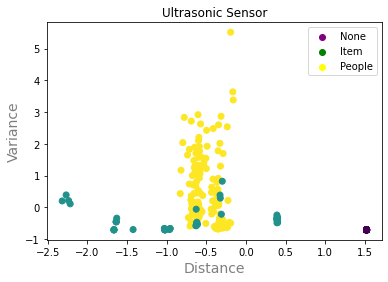

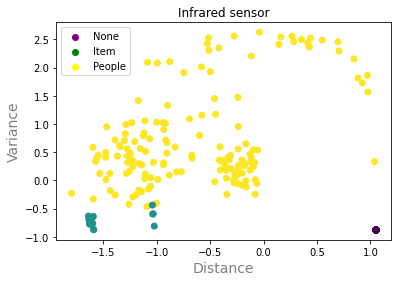

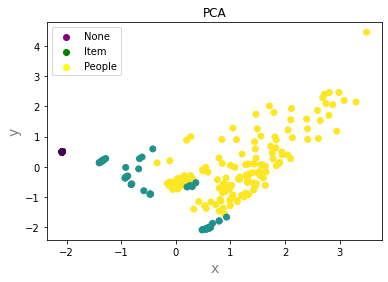

In [9]:
plot_scatter(train_data[:,0],
             train_data[:,2], 
             train_label,
             "Ultrasonic Sensor",
             'Distance',
             'Variance',
             "Ultrasonic_sensor.jpg")

plot_scatter(train_data[:,1],
             train_data[:,3], 
             train_label,
             "Infrared sensor",
             'Distance',
             'Variance',
             "Infrared_sensor.jpg")

plot_scatter(pca_train_data[:,0],
             pca_train_data[:,1], 
             train_label,
             "PCA",
             'x',
             'y',
             "PCA.jpg")


## KMeans

In [10]:
dat_list = []
pca_dat_list = []
lab_list = []
for c in [0,1,2]:
    temp_data = train_data[train_label==c]
    pca_temp_data = pca_train_data[train_label==c]
    k = int(len(temp_data)//5)
    Kmeans_classifier = KMeans(n_clusters=k,random_state=0)
    Kmeans_classifier.fit(temp_data)
    dat_list.extend(Kmeans_classifier.cluster_centers_)
    Kmeans_classifier.fit(pca_temp_data)
    pca_dat_list.extend(Kmeans_classifier.cluster_centers_)
    lab_list.extend([int(c)]*k)
train_mean_data = np.array(dat_list)
pca_train_mean_data = np.array(pca_dat_list)
train_mean_label = np.array(lab_list)


<ipython-input-10-ef361d7c4c30>:9: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  Kmeans_classifier.fit(temp_data)
<ipython-input-10-ef361d7c4c30>:11: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  Kmeans_classifier.fit(pca_temp_data)


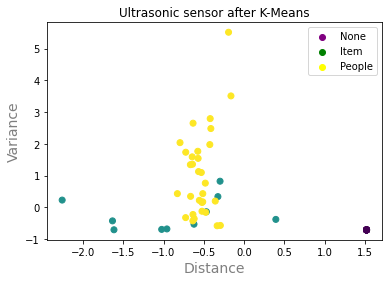

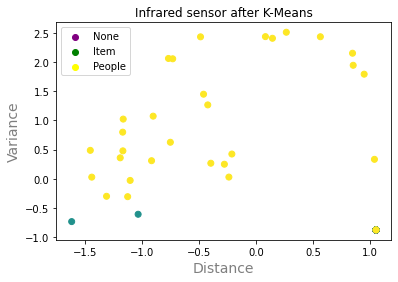

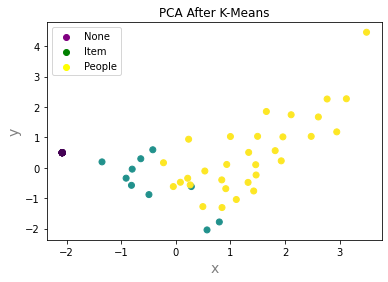

In [11]:
plot_scatter(train_mean_data[:,0],
             train_mean_data[:,2],
             train_mean_label,
             "Ultrasonic sensor after K-Means",
             'Distance',
             'Variance',
             "ultrasonic_sensor_K-Means.jpg")

plot_scatter(train_mean_data[:,1],
             train_mean_data[:,3],
             train_mean_label,
             "Infrared sensor after K-Means",
             'Distance',
             'Variance',
             "Infrared_sensor_K-Means.jpg")

plot_scatter(pca_train_mean_data[:,0],
             pca_train_mean_data[:,1],
             train_mean_label,
             "PCA After K-Means",
             'x',
             'y',
             "pca_KMeans.jpg")


## KNN training

In [12]:
print("KNN accuracy")
for n in range(1,6):
    classifier = neighbors.KNeighborsClassifier(n_neighbors=n)
    classifier.fit(train_data,train_label)
    print("{}_neighbor score: {} ".format(n,classifier.score(test_data,test_label)))
    
print("\nKNN accuracy after K-means")
for n in range(1,6):
    classifier = neighbors.KNeighborsClassifier(n_neighbors=n)
    classifier.fit(train_mean_data,train_mean_label)
    print("{}_neighbor score: {} ".format(n,classifier.score(test_data,test_label)))
    
print("\nKNN accuracy after pca")
for n in range(1,6):
    classifier = neighbors.KNeighborsClassifier(n_neighbors=n)
    classifier.fit(pca_train_data,train_label)
    print("{}_neighbor score: {}".format(n,classifier.score(pca_test_data,test_label)))
    
print("\nKNN accuracy after pca and K-means")
for n in range(1,6):
    classifier = neighbors.KNeighborsClassifier(n_neighbors=n)
    classifier.fit(pca_train_mean_data,train_mean_label)
    print("{}_neighbor score: {}".format(n,classifier.score(pca_test_data,test_label)))

KNN accuracy
1_neighbor score: 0.8142857142857143 
2_neighbor score: 0.7857142857142857 
3_neighbor score: 0.8142857142857143 
4_neighbor score: 0.8142857142857143 
5_neighbor score: 0.8142857142857143 

KNN accuracy after K-means
1_neighbor score: 0.8071428571428572 
2_neighbor score: 0.7785714285714286 
3_neighbor score: 0.9785714285714285 
4_neighbor score: 0.9285714285714286 
5_neighbor score: 0.9571428571428572 

KNN accuracy after pca
1_neighbor score: 0.9357142857142857
2_neighbor score: 0.9285714285714286
3_neighbor score: 0.9357142857142857
4_neighbor score: 0.9357142857142857
5_neighbor score: 0.9357142857142857

KNN accuracy after pca and K-means
1_neighbor score: 0.9285714285714286
2_neighbor score: 0.9571428571428572
3_neighbor score: 0.9857142857142858
4_neighbor score: 0.9785714285714285
5_neighbor score: 0.9357142857142857


In [13]:
def plot_boundary(classifier,X,y,h):
    # Create color maps
    cmap_light = ListedColormap(['#AAFFAA', '#FFDDAA', '#FF99AA'])
    cmap_bold = ListedColormap(['purple', 'green', 'yellow'])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    savefig("boundary.jpg")
    
def plot_table (classifier,test_x):
    pred_label = classifier.predict(test_x)
    N = len(pred_label)
    p0_0 = sum((pred_label[test_label==0]==0)+0)
    p0_1 = sum((pred_label[test_label==1]==0)+0)
    p0_2 = sum((pred_label[test_label==2]==0)+0)
    p1_0 = sum((pred_label[test_label==0]==1)+0)
    p1_1 = sum((pred_label[test_label==1]==1)+0)
    p1_2 = sum((pred_label[test_label==2]==1)+0)
    p2_0 = sum((pred_label[test_label==0]==2)+0)
    p2_1 = sum((pred_label[test_label==1]==2)+0)
    p2_2 = sum((pred_label[test_label==2]==2)+0)
    print("{} {} {}".format(p0_0,p0_1,p0_2))
    print("{} {} {}".format(p1_0,p1_1,p1_2))
    print("{} {} {}".format(p2_0,p2_1,p2_2))
    

3_neighbor score: 0.9857142857142858


<ipython-input-13-b9f9bf4d56c5>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
<ipython-input-13-b9f9bf4d56c5>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


38 0 0
0 25 2
0 0 75


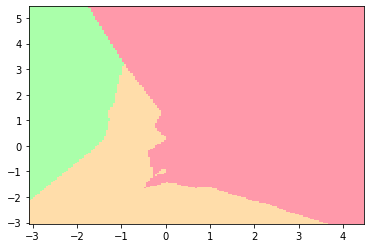

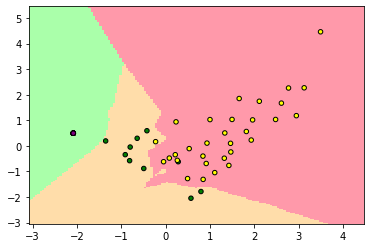

In [14]:
n = 3
classifier = neighbors.KNeighborsClassifier(n_neighbors=n)
classifier.fit(pca_train_mean_data,train_mean_label)
print("{}_neighbor score: {}".format(n,classifier.score(pca_test_data,test_label)))
pickle.dump(classifier,open("F:\ESP32\SeatU\src\data\model","wb"))


plot_boundary(classifier,pca_train_mean_data,train_mean_label,0.05)

plot_table(classifier,pca_test_data)



In [15]:
people_data = genfromtxt('people.txt',delimiter = ',')
item_data = genfromtxt('item.txt',delimiter = ',')
none_data = genfromtxt('none.txt',delimiter = ',')
data = np.concatenate((people_data,item_data,none_data),axis=0)
data = np.log(data+1)
ftsclr=StandardScaler()
ftsclr.fit(data)

pca = pickle.load(open("F:\ESP32\SeatU\src\data\PCA_model","rb"))
classifier = pickle.load(open("F:\ESP32\SeatU\src\data\model","rb"))

test_data = np.array([[40,90,0,20]])
log_data = np.log(test_data+1)
normalized_data = ftsclr.transform(log_data)
test_data_afterPCA = pca.transform(normalized_data)
print (test_data_afterPCA)
result = classifier.predict(test_data_afterPCA)
print(result)

[[ 0.23240906 -0.29681187]]
[2]
